In [1]:
import plotly.graph_objects as go
import numpy as np
from scipy.integrate import solve_ivp

### Modelo de Dinâmica Populacional
- Modelo de Verhulst

O modelo matemático proposto originalmente por Verhulst, onde temos o seguinte PVI:

$$\begin{cases} \dfrac{dP}{dt} = rP \displaystyle \left(1 - \frac{P}{K} \right) \\\\
P(0) = P_0
\end{cases}$$

onde
- $P(t)$ é o número de indivíduos no tempo $t$;
- $r$ é a taxa de crescimento intrínseco;
- $K$ é a capacidade de carga, ou seja, o número máximo de indivíduos que o ambiente
suporta.

In [5]:
# Definindo a EDO
K = 1000
r = 0.1
def Model(t,P):
    return r*P*(1 - P/K)

# Definindo a condição inicial
y0 = 3

# Vetor de tempo
t = np.linspace(0,98,100)

# Resolver Numericamente
sol = solve_ivp(Model, [0,98],[y0], t_eval=t)

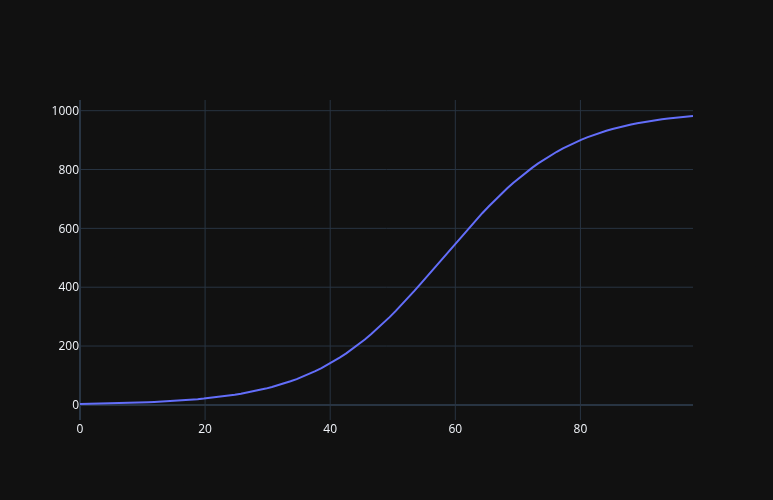

In [6]:
# Visualizando Graficamente

fig = go.Figure(
    data =[ go.Scatter(
        x = sol.t,
        y = sol.y[0],
        mode="lines"
    )]
)

fig.update_layout(height=500, template="plotly_dark")
fig.show()

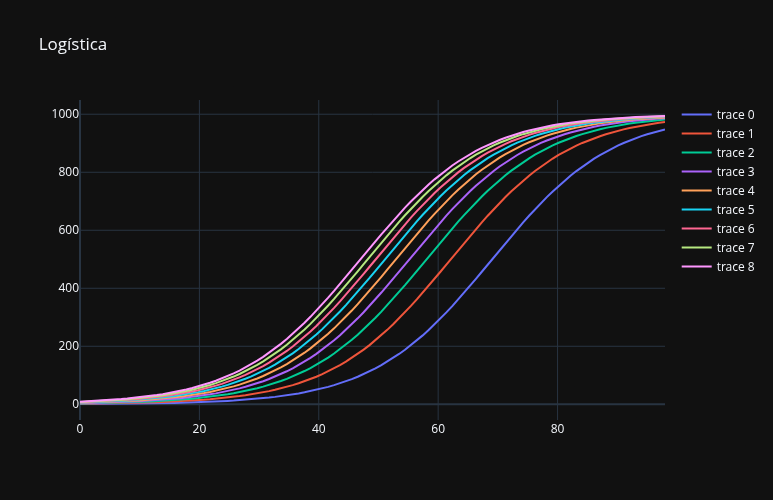

In [4]:
# Resolvendo para varias condições iniciais

fig = go.Figure()

for yi in range(1,10):
    sol = solve_ivp(Model, [0,98], [yi], t_eval=t)
    fig.add_trace(go.Scatter(
        x=sol.t,
        y=sol.y[0]
    ))
fig.update_layout(
    title="Logística",
    height=500,
    template="plotly_dark")

fig.show()